In [ ]:
!pip install mediapipe

In [18]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import os
import numpy as np

## Loading the saved model

In [19]:
import joblib

In [20]:
clf = joblib.load('/content/drive/MyDrive/Colab Notebooks/yoga_classifier.pkl')
print('Classifier loaded completely ...')

Classifier loaded completely ...


## Using Mediapipe for detecting landmark detection 

In [21]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic

In [22]:
def image_processing(file):

  # For static images:
  pose = mp_pose.Pose(
      static_image_mode=True, min_detection_confidence=0.5)

  image = cv2.imread(file)

  # Convert the BGR image to RGB before processing.
  results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  
  try:

    data = results.pose_landmarks

    data = str(data)

    data = data.strip().split('\n')

    garbage = ['landmark {', '}']

    without_garbage = []

    for i in data:
        if i.startswith('  z:'):
            continue

        if i.startswith('  visibility:'):
            continue

        if i.startswith('  presence:'):
            continue
        
        else:
            if i not in garbage:
                without_garbage.append(i)

    clean = []


    for i in without_garbage:
      i = i.strip()
      clean.append(i[3:])

    for i in range(0, len(clean)):
      clean[i] = float(clean[i])

    return(results.pose_landmarks, clean)

  except:
    x = np.zeros((1, 66), dtype=float)[0]
    return(results.pose_landmarks, x)

## Testing on images from test directory

In [24]:
test_path = ['/content/drive/MyDrive/Datasets/Yoga Poses/Test/seatedforwardbend/File10.jpg',
             '/content/drive/MyDrive/Datasets/Yoga Poses/Test/bridge/File2.jpg',
             '/content/drive/MyDrive/Datasets/Yoga Poses/Test/downwarddog/File90.jpg',
             '/content/drive/MyDrive/Datasets/Yoga Poses/Test/mountain/File180.jpg',
             '/content/drive/MyDrive/Datasets/Yoga Poses/Test/plank/File2.jpg',
             '/content/drive/MyDrive/Datasets/Yoga Poses/Test/tree/File7.jpg',
             '/content/drive/MyDrive/Datasets/Yoga Poses/Test/warrior1/File4.jpg' ]


test_labels = ['seatedforwardbend',
               'bridge',
               'downwarddog',
               'mountain',
               'plank',
               'tree',
               'warrior']

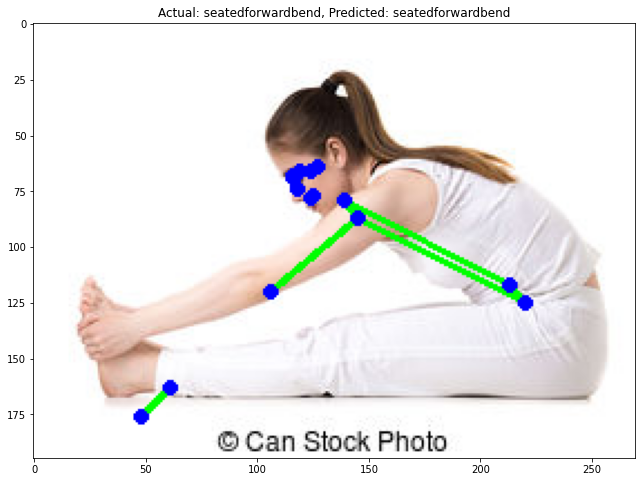

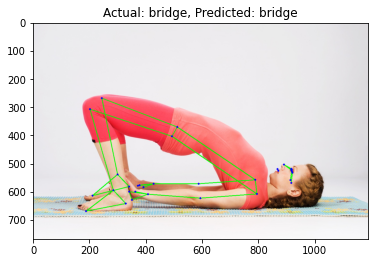

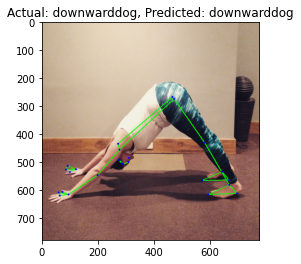

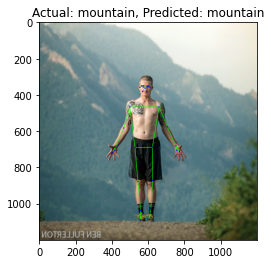

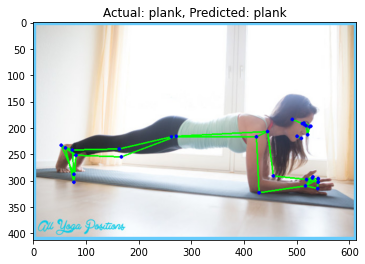

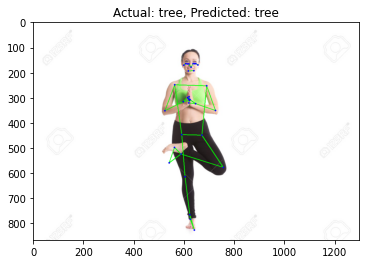

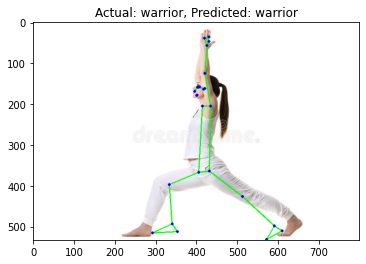

In [25]:
plt.figure(figsize=(12, 8))

count = 0

for i in test_path:

  img = cv2.imread(i)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  landmarks, cleaned_data = image_processing(i)
  y_pred = clf.predict([cleaned_data])

  annotated_image = img.copy()
  mp_drawing.draw_landmarks(annotated_image, landmarks, mp_pose.POSE_CONNECTIONS)

  plt.imshow(annotated_image)
  plt.title(f'Actual: {test_labels[count]}, Predicted: {y_pred[0]}')

  plt.show()  

  count += 1